# Introduction
Aim : Predict person has heart disease or not<br/>
      Study and Learn Logistic Regression
* EDA
* Logistic Regression
* Logistic Regression with Sklearn

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


# EDA

* Data has target column
* This is input (dependent variable)
* Target has two unique value 1 and 0
* 1 -> person has heart disease
* 0 -> person has no heart disease

In [2]:
heart = pd.read_csv("../input/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


This is good because there is no missing value.

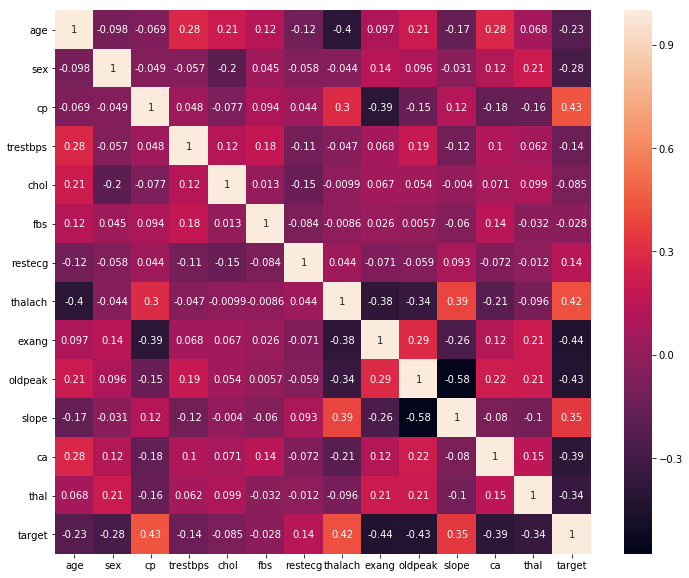

In [4]:
plt.figure(figsize = (12,10))
sns.heatmap(heart.corr(),annot = True)
plt.show()

In [5]:
x = heart.drop("target",axis = 1)
y = heart.target.values

# Split Data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x_train :  (242, 13)
x_test :  (61, 13)
y_train :  (242,)
y_test :  (61,)


Okey,let's write logistic regression with own code.

In [7]:
class LogReg():
    def forward_backward_propagation(self,w,b,x_train,y_train):
        x_train = x_train.T #(13,242)
        y_train = y_train.T #(242,)
        w = w.T     # if we want to multiply two matrix,first matrix column number and second matrix row number must be equal.
        z = np.dot(w,x_train)+b # This is our model
        y_head = 1/(1+np.exp(-z)) # Sigmuid function
        loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) 
        cost = np.sum(loss)/x_train.shape[1] # cost function
        
        dw = np.dot(x_train,(y_head-y_train).T)/x_train.shape[1] #derivative weight
        db = np.sum(y_head-y_train)/x_train.shape[1] #derivative bias
        
        gradients = {"dw":dw,"db":db}
        
        return cost,gradients
    def fit(self,w,b,x_train,y_train,learn_rate,num_it):
        #To reach most fit model we should update our model
        self.cost_list = []
        for i in range(num_it):
            cost,gradients = self.forward_backward_propagation(w,b,x_train,y_train)
            self.cost_list.append(cost)
            
            w = w - learn_rate*gradients["dw"]# update weight
            b = b - learn_rate*gradients["db"]#update bias
        #Last parameters
        self.w = w
        self.b = b
        self.cost = self.cost_list[-1]
    def predict(self,x_test):
        x_test = x_test.T
        z = np.dot(self.w,x_test)+self.b
        y_head = 1/(1+np.exp(-z))
        for i in range(len(y_head)):
            if y_head[i] <= 0.5:
                y_head[i] = 0
            else:
                y_head[i] = 1
        return y_head
    def score(self,x_test,y_test):
        y_head = self.predict(x_test)
        return 1-np.mean(np.abs(y_head-y_test))

    
w = np.full((x_train.shape[1]),0.01)#initial weight values
b = 0.0 #initial bias value

from sklearn.preprocessing import minmax_scale
x_train = minmax_scale(x_train)#Normalize data
x_test = minmax_scale(x_test)# (x-min(x))/(max(x)-min(x))

log_reg = LogReg()
log_reg.fit(w,b,x_train,y_train,2,300)
predict = log_reg.score(x_test,y_test)
predict2 = log_reg.score(x_train,y_train)
print("Test Accurary : {}".format(predict))
print("Train Accurary : {}".format(predict2))

Test Accurary : 0.8688524590163934
Train Accurary : 0.8677685950413223


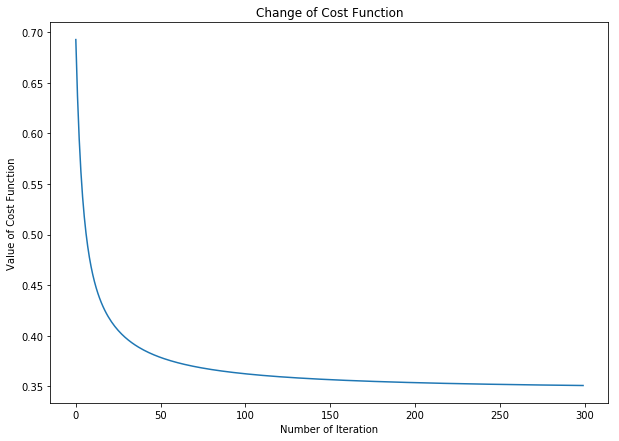

In [8]:
plt.figure(figsize = (10,7))
plt.plot(np.arange(len(log_reg.cost_list)),np.array(log_reg.cost_list))#Change of cost function
plt.title("Change of Cost Function")
plt.ylabel("Value of Cost Function")
plt.xlabel("Number of Iteration")
plt.show()

# Logistic Regression with Sklearn

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predict = lr.score(x_test,y_test)
predict2 = lr.score(x_train,y_train)
print("Test Accurary : {}".format(predict))
print("Train Accurary : {}".format(predict2))

Test Accurary : 0.8524590163934426
Train Accurary : 0.8429752066115702


You see this is very easy with sklearn library